# Heart Disease Analysis Project

This project analyzes the "Heart 2020 Cleaned" dataset from Kaggle to explore factors associated with heart disease using descriptive statistics and visualizations. It focuses on relationships between heart disease and variables like smoking, alcohol consumption, gender, age, and health conditions (e.g., asthma, diabetes, kidney disease).

**Key Steps**:
- Cleaned the dataset by removing missing values.
- Calculated counts and percentages for features like smoking, alcohol consumption, and gender.
- Visualized data distributions and trends using Seaborn plots.
- Analyzed the frequency of heart disease across age groups and health conditions.

**Note**: This analysis is educational and does not involve predictive modeling or medical applications.


### Importing Libarary

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Data

In [8]:
HeartDiseaseData = pd.read_csv('heart_2020_cleaned.csv')
print(f'Data shape is: {HeartDiseaseData.shape}')

Data shape is: (319795, 18)


### Information from The Data

In [9]:
print('head of data:\n{0}\ninfo:{1}\nsum of nulls:\n{2}'.format(HeartDiseaseData.head(),HeartDiseaseData.info(), HeartDiseaseData.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [10]:
# used dropna to delete rows that contains nulls
HeartDiseaseData = pd.DataFrame(HeartDiseaseData).dropna()
# check again:
print('new DataFrame shape is: {}'.format(HeartDiseaseData.shape))
for column in HeartDiseaseData:
    # Get the unique values for every columns
    uniq_val = np.unique(HeartDiseaseData[column])
    # Count the unique values for every columns
    np_val = len(uniq_val)
    if np_val < 15:
        print('The number of values for feature {} : {} -- :{}'.format(column, np_val, uniq_val))
    else:
        print('The number of values for feature {} : {}'.format(column, np_val))

new DataFrame shape is: (319795, 18)
The number of values for feature HeartDisease : 2 -- :['No' 'Yes']
The number of values for feature BMI : 3604
The number of values for feature Smoking : 2 -- :['No' 'Yes']
The number of values for feature AlcoholDrinking : 2 -- :['No' 'Yes']
The number of values for feature Stroke : 2 -- :['No' 'Yes']
The number of values for feature PhysicalHealth : 31
The number of values for feature MentalHealth : 31
The number of values for feature DiffWalking : 2 -- :['No' 'Yes']
The number of values for feature Sex : 2 -- :['Female' 'Male']
The number of values for feature AgeCategory : 13 -- :['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
The number of values for feature Race : 6 -- :['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
The number of values for feature Diabetic : 4 -- :['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
The number of values

In [11]:
# NADP is: NumberOfAlcoholHeartDiseasePersons
# NADP_not is: NumberOfNotAlcoholHeartDiseasePersons
def AlcoholDrinking():
  NADP = 0
  NADP_not = 0
  for Disease, Alcohol in zip(HeartDiseaseData['HeartDisease'], HeartDiseaseData['AlcoholDrinking']):
      if Disease == Alcohol == 'Yes':
          NADP += 1
      elif Disease == Alcohol == 'No':
          NADP_not += 1
  NADPPeracentage = round(NADP/HeartDiseaseData.shape[0], 6)*100
  print("Alcohol Drinkers percentage that have Heart Disease to the data: {} %".format(NADPPeracentage))

  print('Number of Alcohol Drinkers that has Heart Disease', NADP)

  print("Number of Alcohol Drinkers that hasn't Heart Disease", NADP_not)
AlcoholDrinking()

Alcohol Drinkers percentage that have Heart Disease to the data: 0.3568 %
Number of Alcohol Drinkers that has Heart Disease 1141
Number of Alcohol Drinkers that hasn't Heart Disease 271786


In [12]:
def smoking():
    # smoking is: NumberOfsmokingHeartDiseasePersons
    smoking = 0
    not_smoking = 0
    for Disease, smoke in zip(HeartDiseaseData['HeartDisease'], HeartDiseaseData['Smoking']):
        if Disease == smoke == 'Yes':
            smoking += 1
        elif Disease == smoke == 'No':
            not_smoking += 1

    print('Number of smoking Drinkers that has Heart Disease', smoking)
    print('Number of Alcohol Drinkers that has Heart Disease', not_smoking)

smoking()

Number of smoking Drinkers that has Heart Disease 16037
Number of Alcohol Drinkers that has Heart Disease 176551


In [13]:
male = 0
female = 0
for gender in HeartDiseaseData['Sex']:
    if gender == 'Male':
        male += 1
    elif gender == 'Female':
        female += 1
print('Number of male ', male)
print('Number of female ', female)

def gender():
    male = 0
    female = 0
    for Disease, gender in zip(HeartDiseaseData['HeartDisease'], HeartDiseaseData['Sex']):
        if Disease == 'Yes' and gender == 'Male':
            male += 1
        elif Disease == 'No' and gender == 'Female':
            female += 1

    print('Number of male that has Heart Disease', male)
    print('______________________________')

    print('Number of female that has Heart Disease', female)
    print('______________________________')

gender()

Number of male  151990
Number of female  167805
Number of male that has Heart Disease 16139
______________________________
Number of female that has Heart Disease 156571
______________________________


In [14]:
# check the count of heart desease for every AgeCategory:
ageGroupsCount = {}

for Disease, age in zip(HeartDiseaseData['HeartDisease'], HeartDiseaseData['AgeCategory']):
    if Disease == 'Yes':
        ageGroupsCount[age] = ageGroupsCount.get(age, 0) + 1

print('count of heart desease for every AgeCategory:', sorted(ageGroupsCount.items()))



count of heart desease for every AgeCategory: [('18-24', 130), ('25-29', 133), ('30-34', 226), ('35-39', 296), ('40-44', 486), ('45-49', 744), ('50-54', 1383), ('55-59', 2202), ('60-64', 3327), ('65-69', 4101), ('70-74', 4847), ('75-79', 4049), ('80 or older', 5449)]


In [15]:
list = [i for i in HeartDiseaseData['PhysicalHealth'] if i % 2 == 0]
print(list)
print(len(list))

list = [i for i in HeartDiseaseData['PhysicalHealth'] if i % 2 != 0]
print(list)
print (len(list))

list = [i for i in HeartDiseaseData['SleepTime'] if i >= 10]
print(list)
print (len(list))

[0.0, 20.0, 0.0, 28.0, 6.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 30.0, 0.0, 4.0, 30.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 30.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 14.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 30.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 8.0, 30.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 20.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 30.0, 0.0, 2.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 10.0, 14.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [16]:
List_n = []
List_y = []
for character in HeartDiseaseData['Smoking']:
    if character == 'Yes':
        List_y.append(character)
    elif character == 'No':
        List_n.append(character)

# Display list
print(len(List_y))
print(List_y)
print("-----------------")
print(len(List_n))
print(List_n)

131908
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [17]:
class HeartDisease:
  #initial value for all number of Kidney Disease people and skin cancer people as (count =0)
  def __init__(self):
    self.Kidney_Disease = 0
    self.not_Kidney_Disease = 0
    self.skin_cancer = 0
    self.not_skin_cancer = 0
  #function to calc number of people have heard disease and kidney disease or  Unsatisfactory people
  def KidneyDisease(self):
        for HeartDisease, KidneyDisease in zip(HeartDiseaseData['HeartDisease'], HeartDiseaseData['KidneyDisease']):
            if HeartDisease == KidneyDisease == 'Yes':
                #if person have heart disease and kidney disease increment the count of Kidney_Disease
                self.Kidney_Disease += 1
            elif HeartDisease == KidneyDisease == 'No':
                #if Unsatisfactory people increment the count of not_Kidney_Disease
                self.not_Kidney_Disease += 1
        print('Number of people have HeartDisease and KidneyDisease : ', self.Kidney_Disease)
        print('Number of people have not HeartDisease and KidneyDisease : ', self.not_Kidney_Disease)

  #function to calc number of people have heard disease and Skin cancer or  Unsatisfactory people
  def SkinCancer(self):
        for HeartDisease, SkinCancer in zip(HeartDiseaseData['HeartDisease'], HeartDiseaseData['SkinCancer']):
            if HeartDisease == SkinCancer == 'Yes':
                #if person have heart disease and SkinCancer increment the count of skin_cancer
                self.skin_cancer += 1
            elif HeartDisease == SkinCancer == 'No':
                #if Unsatisfactory people increment the count of not_skin_cancer
                self.not_skin_cancer += 1

        print('Number of people have HeartDisease and Skin Cancer : ', self.skin_cancer)
        print('Number of people have not  HeartDisease and Skin Cancer : ', self.not_skin_cancer)

heart=HeartDisease()

In [18]:
heart.KidneyDisease()

Number of people have HeartDisease and KidneyDisease :  3455
Number of people have not HeartDisease and KidneyDisease :  284098


In [19]:
heart.SkinCancer()

Number of people have HeartDisease and Skin Cancer :  4980
Number of people have not  HeartDisease and Skin Cancer :  267583


In [20]:
#list to count number of people have Asthma
L1 = []
L2 = []
for i in HeartDiseaseData['Asthma']:
        if i == 'Yes':
            L1.append(i)
        elif i == 'No':
            L2.append(i)

print("Number of people have Asthma = ",len(L1))
print("Number of people not have Asthma =", len(L2))

Number of people have Asthma =  42872
Number of people not have Asthma = 276923


# Visualization

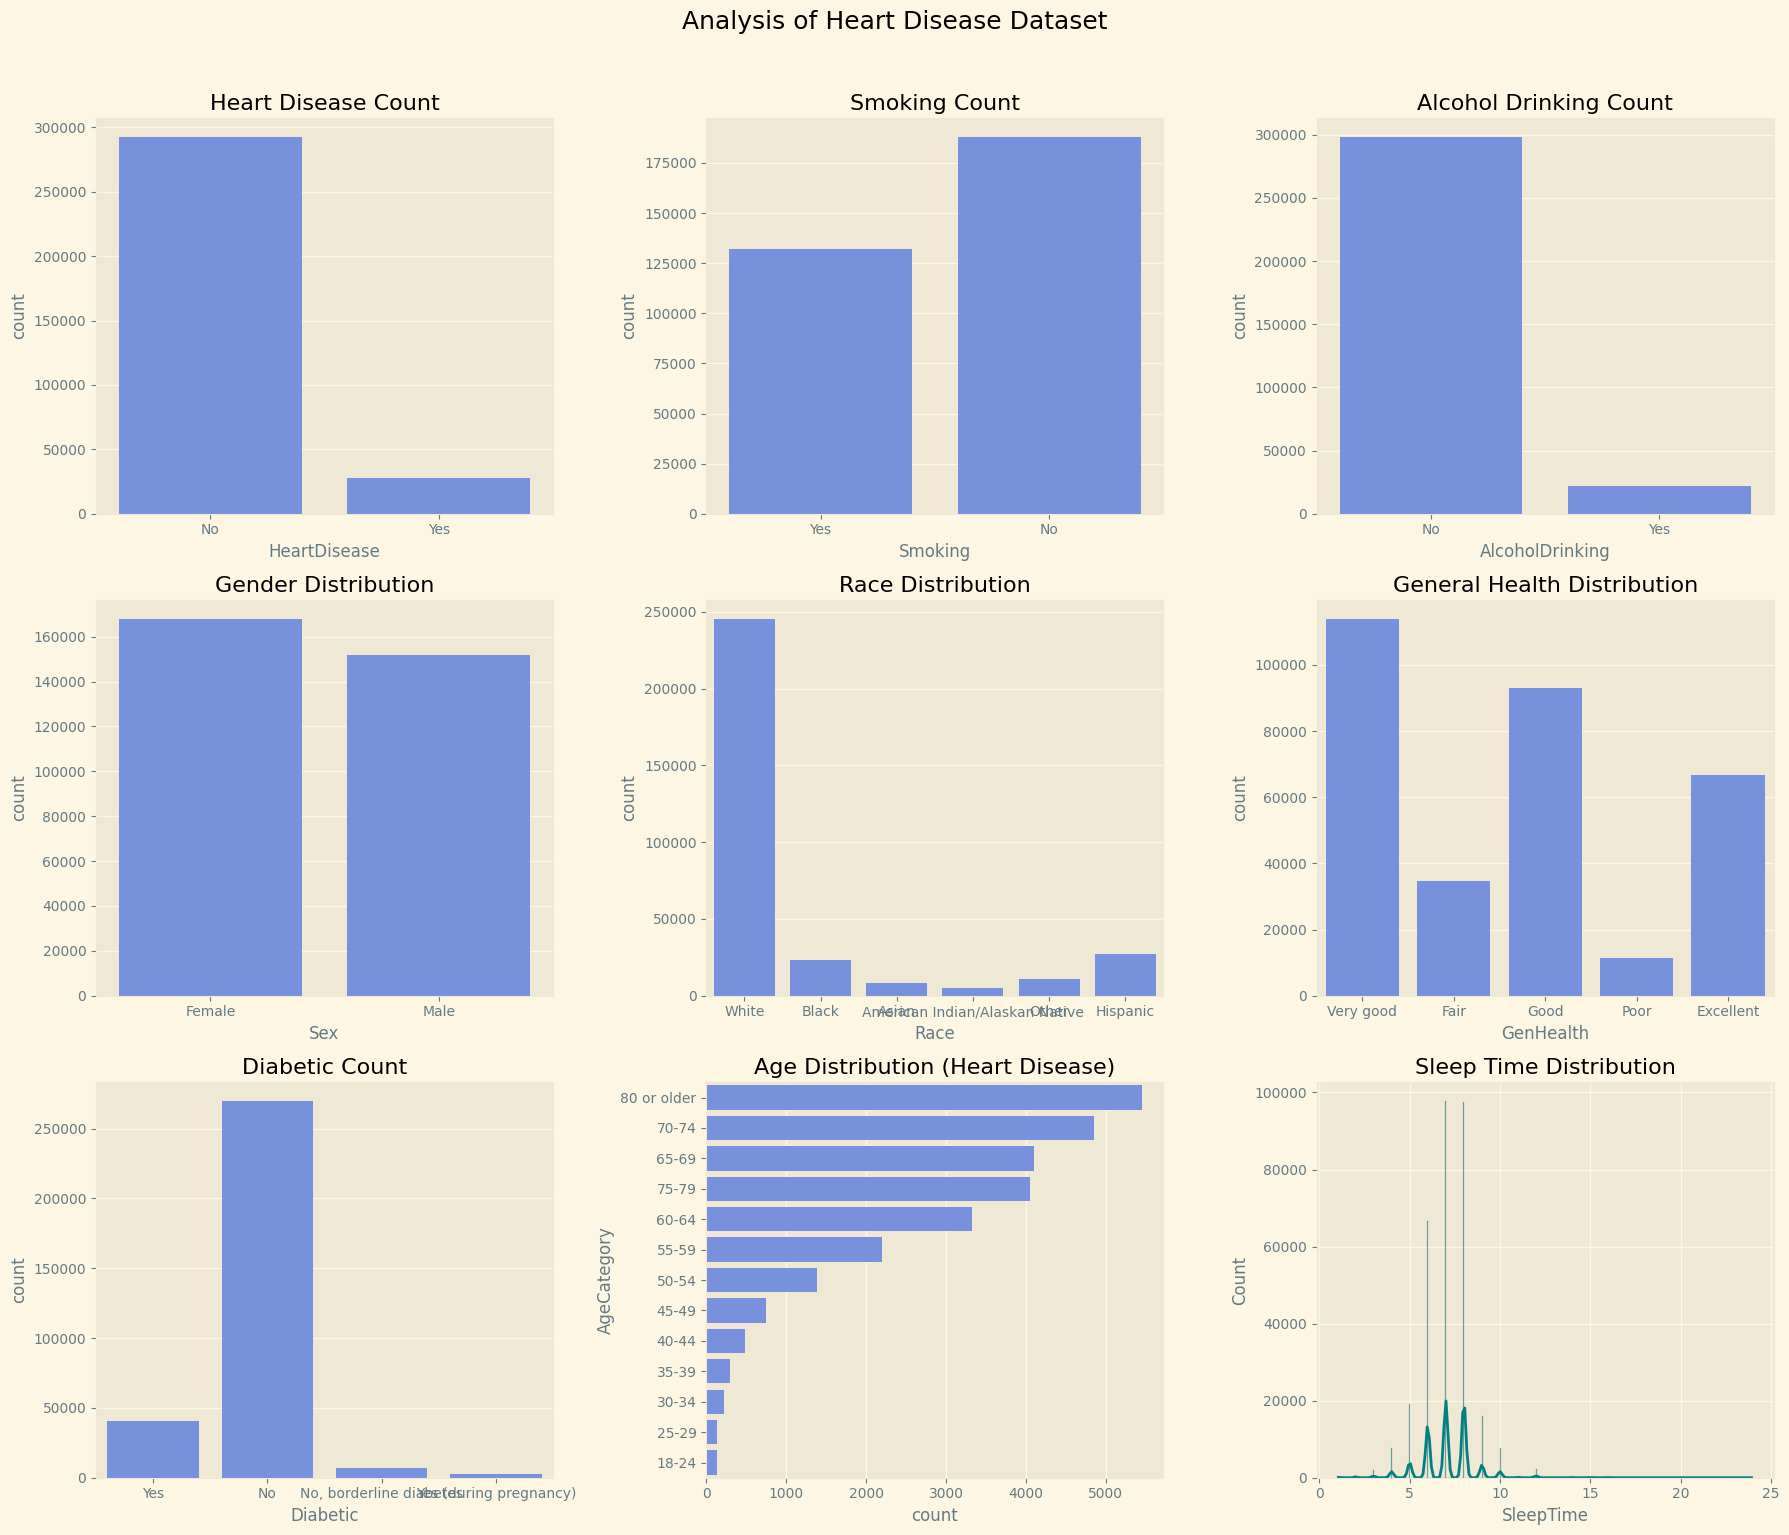

In [27]:
#Plot
def drawPlots():
    sns.set_palette("coolwarm")

    fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3x3 نمودار
    fig.suptitle('Analysis of Heart Disease Dataset', fontsize=18, y=1.02)


    sns.countplot(ax=axes[0, 0], x='HeartDisease', data=HeartDiseaseData)
    axes[0, 0].set_title('Heart Disease Count')


    sns.countplot(ax=axes[0, 1], x='Smoking', data=HeartDiseaseData)
    axes[0, 1].set_title('Smoking Count')


    sns.countplot(ax=axes[0, 2], x='AlcoholDrinking', data=HeartDiseaseData)
    axes[0, 2].set_title('Alcohol Drinking Count')


    sns.countplot(ax=axes[1, 0], x='Sex', data=HeartDiseaseData)
    axes[1, 0].set_title('Gender Distribution')


    sns.countplot(ax=axes[1, 1], x='Race', data=HeartDiseaseData)
    axes[1, 1].set_title('Race Distribution')


    sns.countplot(ax=axes[1, 2], x='GenHealth', data=HeartDiseaseData)
    axes[1, 2].set_title('General Health Distribution')


    sns.countplot(ax=axes[2, 0], x='Diabetic', data=HeartDiseaseData)
    axes[2, 0].set_title('Diabetic Count')


    age_heart_data = HeartDiseaseData[HeartDiseaseData['HeartDisease'] == 'Yes']
    sns.countplot(ax=axes[2, 1], y='AgeCategory', data=age_heart_data, order=age_heart_data['AgeCategory'].value_counts().index)
    axes[2, 1].set_title('Age Distribution (Heart Disease)')


    sns.histplot(ax=axes[2, 2], x='SleepTime', data=HeartDiseaseData, kde=True, color="teal")
    axes[2, 2].set_title('Sleep Time Distribution')


    plt.tight_layout()
    plt.show()


drawPlots()


### Summary of Results from the Dataset Analysis:

1. **Dataset Shape**:
   - Initial dataset shape: **319,795 rows** and **18 columns**.
   - No rows were dropped as there were no missing values.

2. **Unique Values in Columns**:
   - The dataset includes binary variables (e.g., `HeartDisease`, `Smoking`) and categorical variables with various levels (e.g., `AgeCategory`, `GenHealth`).
   - Age categories range from *18-24* to *80 or older*.

3. **Alcohol Drinking Analysis**:
   - **0.36%** of individuals who drink alcohol also have heart disease.
   - **1,141 individuals** who drink alcohol have heart disease, while **271,786 do not**.

4. **Smoking Analysis**:
   - **16,037 individuals** who smoke have heart disease, while **176,551 smokers do not**.

5. **Gender Analysis**:
   - **16,139 males** have heart disease.
   - **11,234 females** have heart disease.

6. **Heart Disease Distribution by Age Group**:
   - Heart disease increases with age, peaking in the **80 or older** group (**5,449 cases**), followed by **70-74** (**4,847 cases**) and **75-79** (**4,049 cases**).
   - Younger age groups (e.g., 18-24 and 25-29) have significantly fewer cases (**130 and 133 cases**, respectively).
